# Assignment #07
#### Unit 07
---

## #07-01: Getting those for-loops dialled

In this exercise, you will work with synthetically created precipitation data. Let me set this 'data set' up for you:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# create a "time" vector of hourly counts over 7 days
t = np.arange(24*7)

# create random "outage" time and noise
t_outage = np.random.randint(140, 160, 1)
precip_noise = np.random.normal(1.5, 0.5, t.size)

# create a precipitation pattern with a sine wave and superposed noise
precip = 3*np.sin(t/(6*np.pi)) + precip_noise

# set all negative precip to zero and create "precipitation gauge outage"
precip[precip < 0] = 0
precip[(t > t_outage-5) & (t < t_outage+5)] = 0

The previous code cell generated what I refer to as the "time" vector `t` for now. It symbolizes time by counting the hours of one week (=24*7). It also generates a synthetic precipitation measurement from a rain gauge by combining a sine wave with random noise. Unfortunately, our rain gauge experienced a problem, which caused the measurement to be unrealiable for a short time.

Here is what the data looks like:

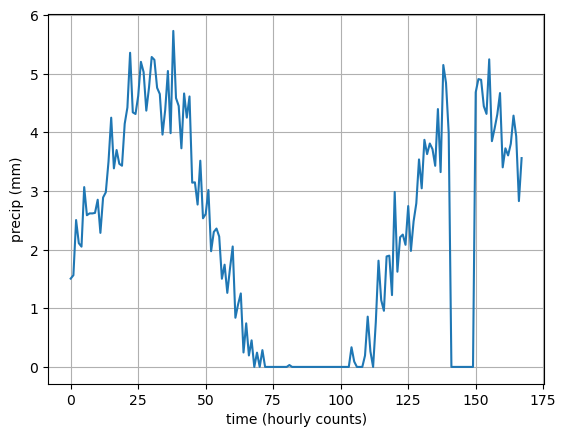

In [2]:
plt.figure()
plt.plot(t, precip)
plt.grid()
plt.xlabel("time (hourly counts)")
plt.ylabel("precip (mm)")
plt.show()

Make sure you understand what the previous code cells do, before you jump to the actual exercises.

 1. Rewrite my vectorized statement `precip[(t > 150) & (t < 160)] = 0` in a for loop
 2. Vector `t_noon = np.arange(12, 7*24, 24)` holds the hourly count for noon each day. Calculate a vector `precip_total` that sums up the total precipitation from each day (i.e., Day 1 goes from 0--23). Add your result to the plot we already have by adding the line `plt.plot(t_noon, precip_total, col = "black")`. 
 3. Calculate the moving average of `precip` using a 3h time window. Implement the moving average with a for loop. Basically, at each iteration i the moving average equals the sum of precip elements `precip[i-1], precip[i], precip[i+1]`. Do not compute moving averages for the first and last elements of `precip`. When you're done, add the moving average to the plot.
 4. Code a function that computes the start times of storms based on hourly precipitation data. Your algorithm should be based on the following assumptions:
      - We define the start time of a storm as the last hour with zero precip, one hour prior should also be precip-free, and one hour later should have non-zero precip. The first and last hours of our data set can therefore not be start times of a storm.
      - Implement one function that solves the challenge with a for loop, and then a second function that solves the challenges with a vectorized solution (tip: use `np.diff()` for the vectorized approach)
 5. Analogously, code a function that detects the start and end times of rain gauge outages based on the following assumptions:
      - We assume a rain gauge outage, when the precip is zero for more than three hours and when the precip drops and increases rapidly at the start/end times of the outage, i.e., with an absolute difference of more than twice the precip standard deviation.
 6. When you're done with steps 4 and 5, edit the following code cell to adjust the plot, so that the red vertical line and red shading match the correct times based on the calculations of your functions. If you re-run the first code cell where precip is generated, you will get slightly different times. If you then run the following code cell again, you will see whether your functions pick up on the changed data set and still return the correct result. If they don't return the correct result, try to assess whether our underlying rules and assumptions are too crude or whether there is a bug in your function.

## Question 1 
Rewrite my vectorized statement `precip[(t > 150) & (t < 160)] = 0` in a for loop

In [3]:
# for i, ti in enumerate(t):
#     if ti > 150 and ti < 160:
#         precip[i] = 0

## Question 2
Vector `t_noon = np.arange(12, 7*24, 24)` holds the hourly count for noon each day. Calculate a vector `precip_total` that sums up the total precipitation from each day (i.e., Day 1 goes from 0--23). Add your result to the plot we already have by adding the line `plt.plot(t_noon, precip_total, marker = 'o', color = "black")`. 

In [4]:
t_noon = np.arange(12, 7*24, 24)
t_midnight = np.arange(0, 7*24, 24)
precip_total = np.zeros(t_midnight.shape)
for i, tmi in enumerate(t_midnight):
    precip_total[i] = precip[tmi:tmi+24].sum()

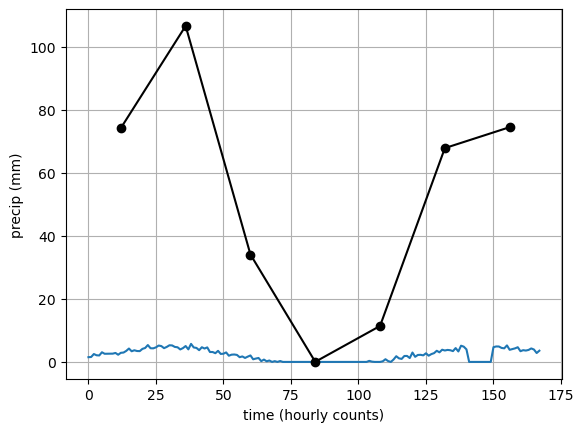

In [5]:
plt.figure()
plt.plot(t, precip)
plt.plot(t_noon, precip_total, marker = 'o', color = "black")
plt.grid()
plt.xlabel("time (hourly counts)")
plt.ylabel("precip (mm)")
plt.show()

## Question 3
Calculate the moving average of `precip` using a 3h time window. Implement the moving average with a for loop. Basically, at each iteration i the moving average equals the sum of precip elements `precip[i-1], precip[i], precip[i+1]`. Do not compute moving averages for the first and last elements of `precip`. When you're done, add the moving average to the plot.

In [6]:
precip_ma = np.full(precip.shape, np.nan)  # fill a vector with the same shape as `precip` with NaN's ("not a number")
for i, pi in enumerate(precip):
    if (pi in (precip[0], precip[-1])):
        continue
    # precip_ma[i] = np.mean([precip[i-1], precip[i], precip[i+1]])  # Variante A
    precip_ma[i] = np.mean(precip[i-1:i+2])  # Variante B: Achtung auf den korrekten Index 'i+2'!!

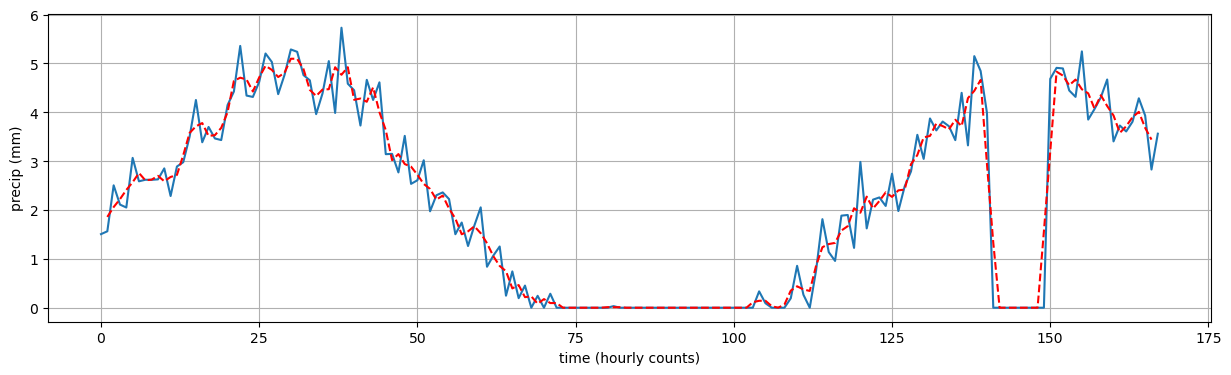

In [7]:
plt.figure(figsize=(15, 4))
plt.plot(t, precip)
plt.plot(t, precip_ma, color = "red", linestyle = "--")
plt.grid()
plt.xlabel("time (hourly counts)")
plt.ylabel("precip (mm)")
plt.show()

## Question 4:
Code a function that computes the start times of storms based on hourly precipitation data. Your algorithm should be based on the following assumptions:
  - We define the start time of a storm as the last hour with zero precip, one hour prior should also be precip-free, and one hour later should have non-zero precip. The first and last hours of our data set can therefore not be start times of a storm.
  - Implement one function that solves the challenge with a for loop, and then a second function that solves the challenges with a vectorized solution (tip: use `np.diff()` for the vectorized approach)

In [8]:
def find_storm_start_loop(precip, t):
    start_times = []
    for i, pi in enumerate(precip):
        if (pi not in (precip[0], precip[-1])) and (np.isclose(pi, 0)) and (np.isclose(precip[i-1], 0)) and (precip[i+1] > 0):
            start_times.append(t[i])
    return start_times

In [9]:
def find_storm_start_vectorized(precip, t):
    vi = precip[1:-1]
    vi_minus = precip[:-2]
    vi_plus = precip[2:]
    ti = t[1:-1]
    start_times = ti[np.isclose(vi, 0) & np.isclose(vi_minus, 0) & (vi_plus > 0)]
    return start_times

In [10]:
identical = (find_storm_start_loop(precip, t) == find_storm_start_vectorized(precip, t)).all()
print(f"The computed start times for the two functions are identical: {identical}")

The computed start times for the two functions are identical: True


(-0.1, 7.0)

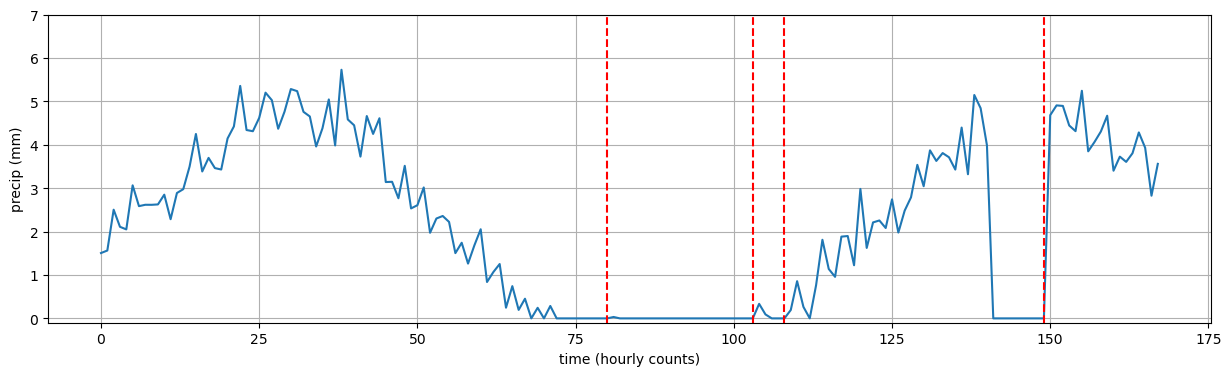

In [11]:
storm_start = find_storm_start_loop(precip, t)
outage = (130, 170)
plt.figure(figsize=(15, 4))
plt.plot(t, precip)
# plt.fill_between(t, -10, 30, where=((t > outage[0]) & (t < outage[1])), color='red', alpha=0.2)
for ti in storm_start:
    plt.axvline(x=ti, color='red', linestyle='--')
plt.grid()
plt.xlabel("time (hourly counts)")
plt.ylabel("precip (mm)")
plt.ylim(-0.1, 7)

## Question 5
Analogously, code a function that detects the start and end times of rain gauge outages based on the following assumptions:
  - We assume a rain gauge outage, when the precip is zero for more than three hours and when the precip drops and increases rapidly at the start/end times of the outage, i.e., with an absolute difference of more than twice the precip standard deviation.

In [12]:
def find_outage(precip, t):

    p_diff = abs(np.diff(precip))  # absolute difference between elements
    p_diff = np.concatenate(([0], p_diff))  # prepend 0 to make p_diff same length as precip
    p_std = precip.std()  # compute standard deviation

    # find indices where the precip drops/increases by more than 2 stds
    t_abrupt = np.where(p_diff > 2*p_std)[0]  # np.where returns a tuple, where the first element is the desired array of indices

    outage_start = []
    outage_end = []
    # let's check all intervals between times t_abrupt
    if t_abrupt.size >= 2:  # need at least to times for an interval to form
        for tl, tu in zip(t_abrupt[:-1], t_abrupt[1:]):   # remember that trick! it's useful
            if all(np.isclose(precip[tl:tu], 0)):
                outage_start.append(tl-1)
                outage_end.append(tu)

    return outage_start, outage_end

(-0.1, 7.0)

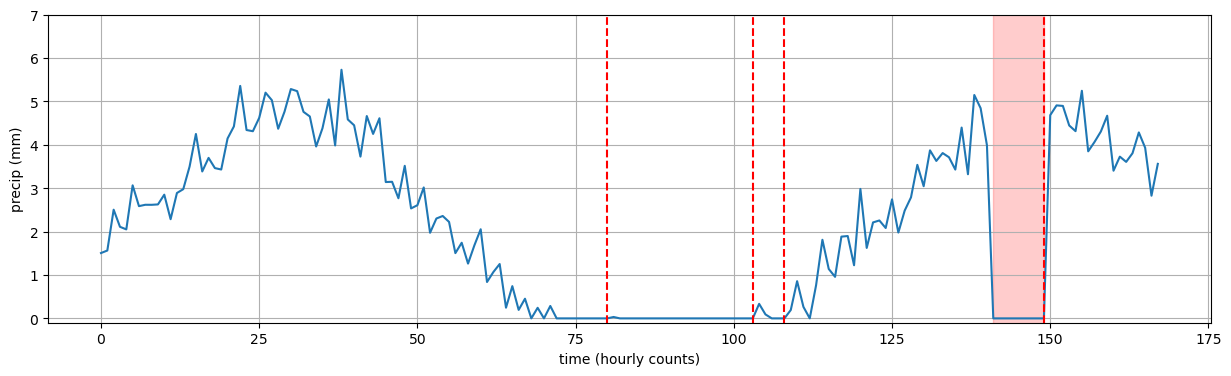

In [13]:
storm_start = find_storm_start_loop(precip, t)
out_start, out_end = find_outage(precip, t)

plt.figure(figsize=(15, 4))
plt.plot(t, precip)
for os, oe in zip(out_start, out_end):
    plt.fill_between(t, -10, 30, where=((t > os) & (t < oe)), color='red', alpha=0.2)
for ti in storm_start:
    plt.axvline(x=ti, color='red', linestyle='--')
plt.grid()
plt.xlabel("time (hourly counts)")
plt.ylabel("precip (mm)")
plt.ylim(-0.1, 7)